# What do your blood sugars tell you?


![alt text](img/image.jpg)


## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

## Executive Summary

### Project Overview
This project involves analyzing a dataset for predicting the likelihood of diabetes using several features such as glucose levels, blood pressure, insulin, and body mass index (BMI). The primary objective is to build a predictive model that accurately identifies individuals at risk of diabetes based on both biological factors and family history.

### Data Preprocessing and Feature Engineering
- **Outliers Handling**: Outliers were identified and handled using both the IQR method and a custom technique based on the z-score (3 standard deviations). This ensured that extreme values did not unduly influence the model.
- **Missing Values**: Missing values, primarily represented as zeros in columns like **Insulin**, **SkinThickness**, and **BloodPressure**, were replaced by predicted values using other available features rather than simple mean imputation. This enhanced the data’s predictive power.
- **Feature Scaling**: The dataset was scaled using methods appropriate for each feature, used RobustScalar to ensure the outliers that weren't dealt with doesn't affect the model performance, ensuring that no feature disproportionately impacted the model.
- **Mutual Information Analysis**: A mutual information analysis was performed to rank features based on their importance in predicting the target variable (diabetes outcome). Key features such as **Glucose**, **BloodPressure**, **Insulin**, and **Age** had the highest mutual information scores, indicating they are most predictive. features were also scaled by theri importance to the target variable.

### Feature Importance

Based on mutual information, the most important features for predicting diabetes are:
|  **Feature** | **Mutual Information** |
|:---:|:---:|
|  Insulin   |  0.385976 |
|  SkinThickness   | 0.262024  |
| Glucose  | 0.170098  |
| BloodPressure  | 0.135170  |
| BMI  | 0.106836  |
| Age  | 0.098755  |
| DiabetesPedigreeFunction  | 0.027636  |
| Pregnancies  | 0.026698  |
|-- |- -|

Less important features like **Pregnancies** and **DiabetesPedigreeFunction** were also retained but are less informative.

### Multicollinearity Detection
- Variance Inflation Factor (VIF) analysis revealed significant multicollinearity among features such as **BMI** (VIF: 18.4) and **Glucose** (VIF: 16.7).
- Which wasn't addressed as the modelling algorithem used are not affected by it.

### Modeling Approaches
Several classification algorithms were explored, including:
- **Logistic Regression**
- **RandomForestClassifier**
- **GradientBoostingClassifier**
- **XGBClassifier**
- **SVC**
- **GaussianNB**

SMOTE was used to ensure that class imbalances did not bias the model results, and **class weighting** was adjusted to further handle the imbalanced target variable.

The final model was a combination of the best model with the best paramiters found using RandomSearchCV. and was created with StackingClassifier. Achiving an accuracy of 0.95.

### Model Evaluation
The models were evaluated using the following metrics:
- **Accuracy**: The proportion of correct predictions.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positive predictions among all actual positive instances.
- **F1 Score**: The harmonic mean of precision and recall.
- **ROC-AUC**: The area under the receiver operating characteristic curve, which measures the model's ability to distinguish between classes.

### Results
- The models achieved strong performance,`StackingClassifier`. Achiving an accuracy of 0.95.
- To improve performance further, feature engineering, such as combining correlated features and scaling, played a crucial role.
- The results also highlighted the importance of **Glucose**, **Insulin**, and **Age** in predicting diabetes.

### Handling Real-World Scenarios
- The Person class was created to handle missing values and predict the likelihood of diabetes based on the available data, filling the missing values with the mean.
- The Person class was also used to predict the likelihood of diabetes for a new patient based on their medical history and demographic information.

### Future Work
- **Hyperparameter Tuning**: Further hyperparameter tuning could be performed to optimize the model's performance.
- **Feature Selection**: Advanced feature selection techniques like recursive feature elimination could be used to identify the most predictive features.
- **Ensemble Methods**: Additional ensemble methods like AdaBoost could be explored to further enhance model performance.
- **Website Implementation**: I plan on creating a website where users can input their medical data and receive a prediction of their diabetes risk.

### Conclusion
This notebook provides a comprehensive workflow for data preprocessing, feature engineering, and model building to predict diabetes. The approach is robust, handling issues like outliers, missing values, and multicollinearity, while leveraging key features like **Glucose**, **SkinThickness** and **Insulin** to achieve high prediction accuracy.

### 📚 Libraries
In this notebook, we will use the following libraries:
- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for model building and evaluation
- `xgboost` for gradient boosting algorithms

### 📝 Note
This notebook is a work in progress, and I will continue to update it with new insights and model improvements. If you have any suggestions or feedback, please feel free to leave a comment.
This model was trained for a competition with limited data and features and is in no way a substitute for professional medical advice. Always consult a healthcare provider for medical advice and treatment.

>[Linkedin: Adejori Eniola]('https://www.linkedin.com/in/adatamage/')

# Import Packages, data and handle default settings 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]

In [5]:

data = pd.read_csv('diabetes.csv')
# Display the first few rows of the DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Quick Exploration and General Statistics

In [6]:
#view the data types of each column and the number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#view the summary statistics of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




## 📚 Observations:
- Several features (e.g., Glucose, Blood Pressure, Skin Thickness, Insulin, BMI) have a minimum value of 0, which may indicate missing data or errors.
- The high variance in some features, especially Insulin, suggests significant variability in the dataset.
- Median values (50th percentile) are often different from the mean, indicating skewness in the data distribution.
- An insulin of 846 seems unlikely and look like a possible outlier

This summary helps in understanding the central tendency, spread, and potential issues such as missing data or outliers in the dataset.


## 📊 Exploratory Data Analysis (EDA)

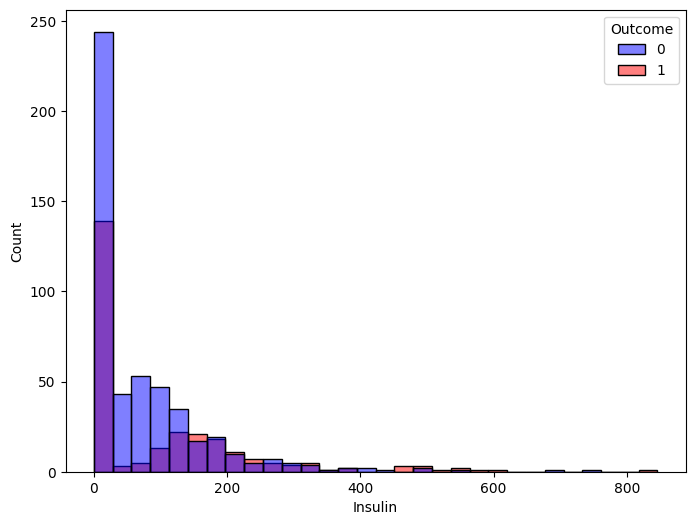

In [8]:
# Histogram of Insulin levels by Outcome (outcome 0 = no diabetes, outcome 1 = diabetes)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Insulin", hue="Outcome", bins=30, palette=["blue", "red"])
plt.show()

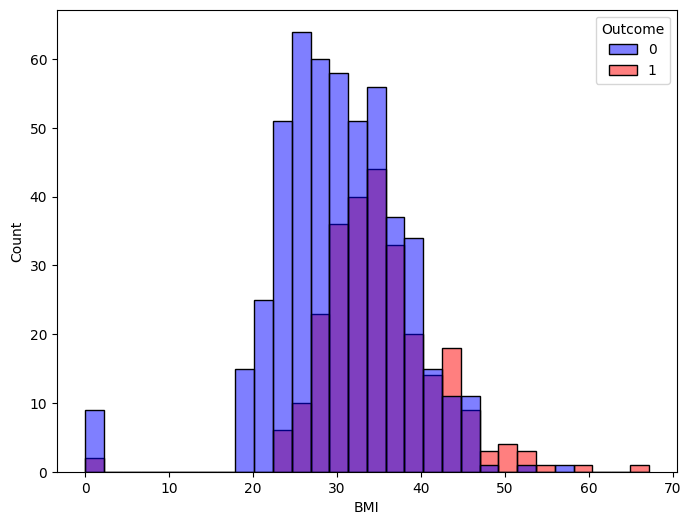

In [9]:
# Histogram of BMI levels by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="BMI", hue="Outcome", bins=30, palette=["blue", "red"])   
plt.show()

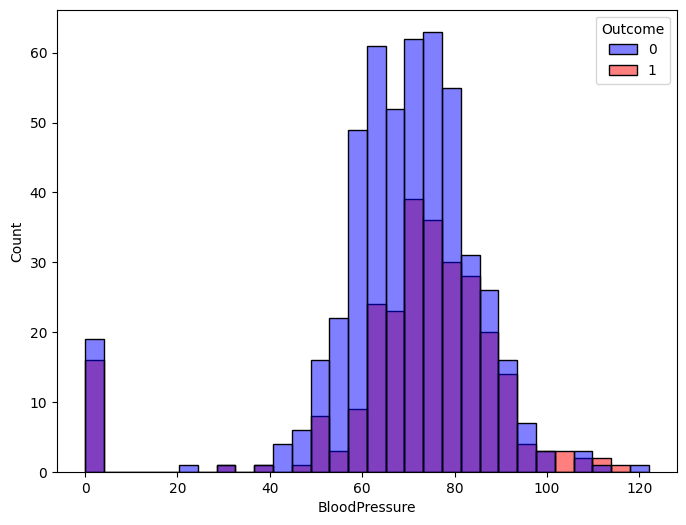

In [10]:
# Histogram of Blood Pressure levels by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="BloodPressure", hue="Outcome", bins=30, palette=["blue", "red"])
plt.show()

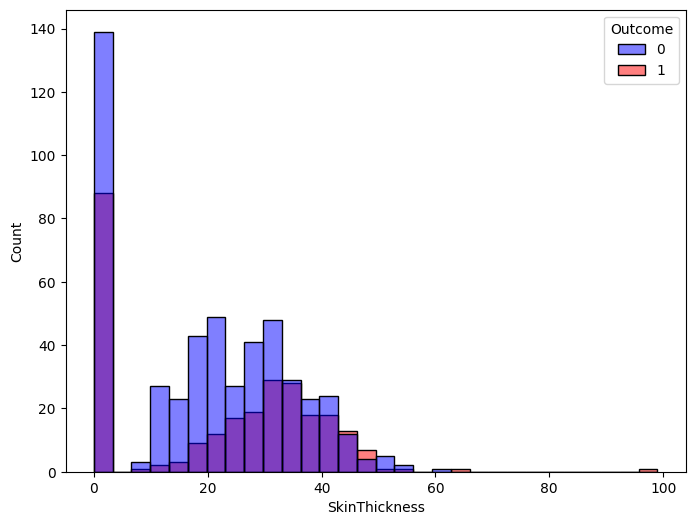

In [11]:
# Histogram of Skin Thickness levels by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="SkinThickness", hue="Outcome", bins=30, palette=["blue", "red"])
plt.show()

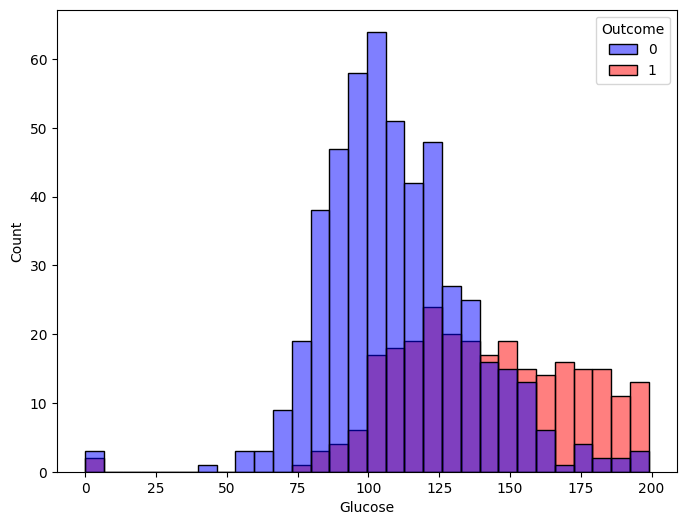

In [12]:
# Histogram of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Glucose", hue="Outcome", bins=30, palette=["blue", "red"])
plt.show()

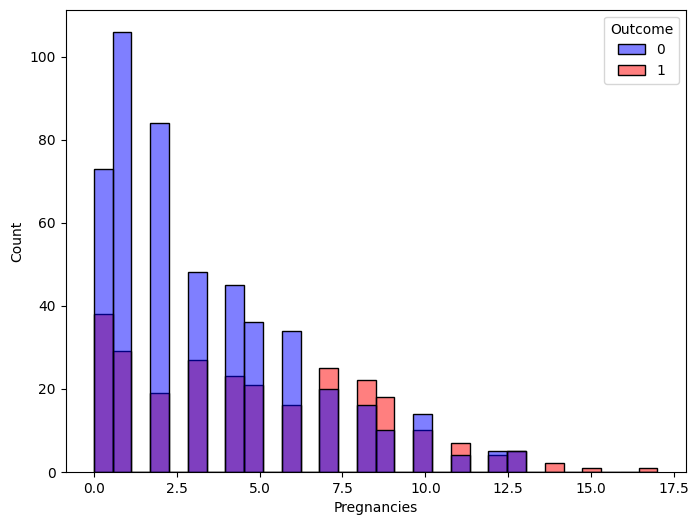

In [13]:
# Histogram of Pregnancies by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Pregnancies", hue="Outcome", bins=30, palette=["blue", "red"])
plt.show()

# Missing values treatment

In [14]:
df1 = data.copy()

In [15]:
# basic fill with mean based on Outcome
fill_with_mean = ["BMI", "Glucose", "BloodPressure", "SkinThickness", "Insulin"]

def fill_mean(data, col_name):
    """
    fills missing values with the mean of the column based on the Outcome
    Args:
        data (Dataframe): the dataframe to fill the missing values
        col_name (str): the column name to fill the missing values
    
    Returns:
        None
    """
    
    df1[col_name] = df1[col_name].replace(0, np.nan)
    mean_col_0 = data[data["Outcome"] == 0][col_name].mean()
    mean_col_1 = data[data["Outcome"] == 1][col_name].mean()

    data.loc[(data["Outcome"] == 0) & (data[col_name].isnull()), col_name] = mean_col_0
    data.loc[(data["Outcome"] == 1) & (data[col_name].isnull()), col_name] = mean_col_1

for col in fill_with_mean:
    fill_mean(df1, col)

In [16]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


# Outliers detection / Treatment

In [17]:
df2 = df1.copy()

In [18]:
def handle_outliers_random_directional(df, feature):
    """
    Handle outliers by replacing them with a random value between 2.3 and 3 standard deviations from the mean,
    while ensuring that values originally above the mean stay above, and values below stay below.

    Args:
        df: (pandas DataFrame) - The dataframe containing the data.
        feature: (str) - The feature/column name for which to handle outliers.

    Returns:
        df: pandas DataFrame - DataFrame with outliers replaced for the specified feature.
    """

    # Calculate the mean and standard deviation
    mean = df[feature].mean()
    std = df[feature].std()

    # Define the upper and lower bounds (3 standard deviations away from mean)
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Identify outliers beyond the bounds
    outliers_above = df[feature] > upper_bound
    outliers_below = df[feature] < lower_bound

    # Replace values above the mean with a random number between 1 and 3 standard deviations above the mean
    random_above = np.random.uniform(
        mean + 2.5 * std, mean + 3 * std, size=len(df[outliers_above])
    )
    df.loc[outliers_above, feature] = random_above

    # Replace values below the mean with a random number between 1 and 3 standard deviations below the mean
    random_below = np.random.uniform(
        mean - 3 * std, mean - 2.5 * std, size=len(df[outliers_below])
    )
    df.loc[outliers_below, feature] = random_below

    return df

In [19]:
df2 =handle_outliers_random_directional(df1, "Insulin")

In [20]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,153.565212,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,73.745772,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,421.077929,67.10000,2.420000,81.000000,1.000000


In [21]:
data_correlation = df2.corr()

<Axes: >

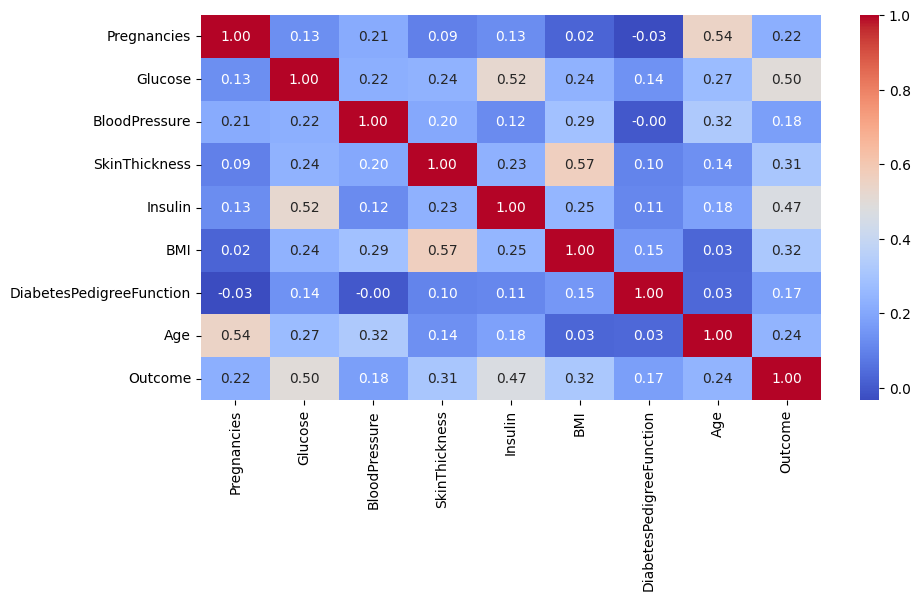

In [22]:
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt=".2f")

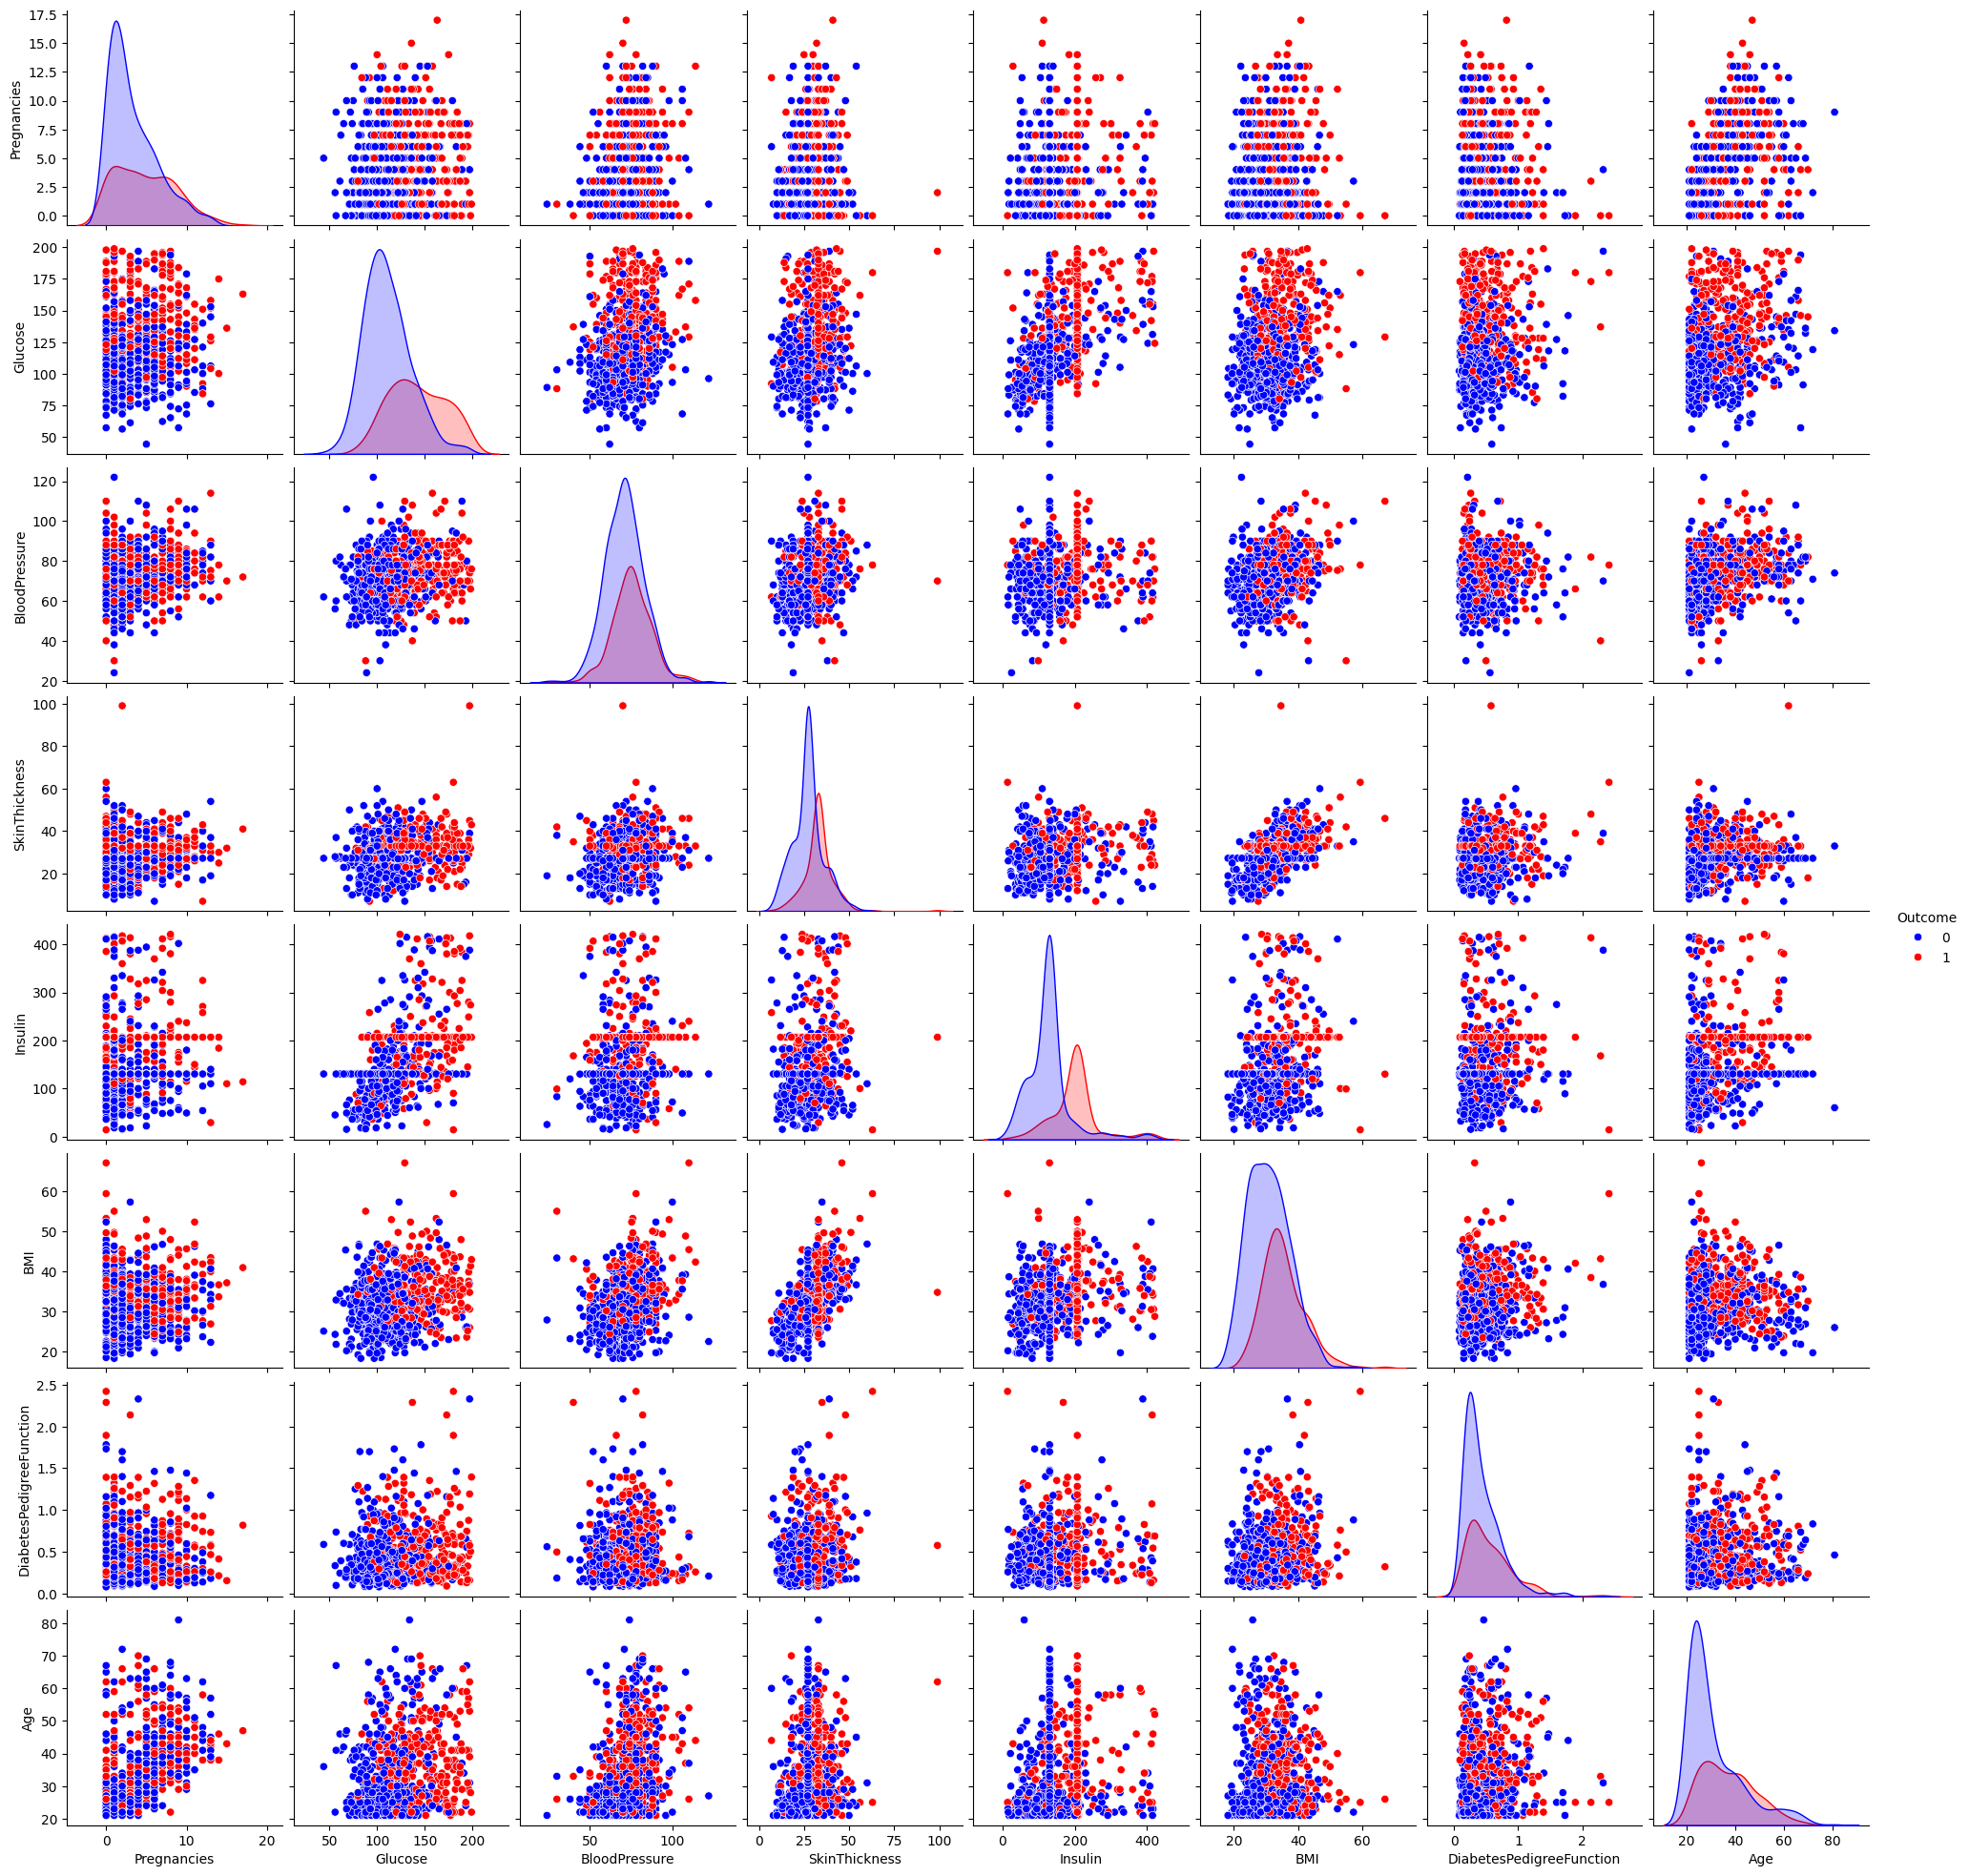

In [23]:
sns.pairplot(df2, hue='Outcome', palette=["blue", "red"])
plt.show()

In [24]:
# Correlation of each feature with the target variable
data_correlation['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495954
Insulin                     0.467286
BMI                         0.315271
SkinThickness               0.308094
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.175087
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

In [25]:
#check of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2.drop('Outcome', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Pregnancies,3.283783
1,Glucose,23.785972
2,BloodPressure,31.872986
3,SkinThickness,17.849959
4,Insulin,7.580791
5,BMI,34.565681
6,DiabetesPedigreeFunction,3.141962
7,Age,14.331063


In [26]:
#check for class imbalance
df2['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = df2.drop('Outcome', axis=1)
y = df2['Outcome']


smote = SMOTE()
# Resample the data using SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the data into train and test sets, shuffling the data and stratifying the target
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29, shuffle=True)

In [28]:
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight

sample_weight = compute_sample_weight(class_weight="balanced", y=y_train)

# Determine the most important factors affecting the diabetes outcome.

In [29]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between the features and the target
mutual_info = mutual_info_classif(X_resampled, y_resampled)

# Display the results
mutual_info_df = pd.DataFrame(
    {"Feature": X_resampled.columns, "Mutual Information": mutual_info}
)
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False)
print(mutual_info_df)

                    Feature  Mutual Information
4                   Insulin            0.379356
3             SkinThickness            0.256455
1                   Glucose            0.166716
2             BloodPressure            0.123866
5                       BMI            0.106035
7                       Age            0.069583
6  DiabetesPedigreeFunction            0.043869
0               Pregnancies            0.022986


In [30]:
from sklearn.preprocessing import RobustScaler

X_train_scaled = X_train * mutual_info
R_scaler = RobustScaler()
X_train_scaled = R_scaler.fit_transform(X_train_scaled)

# 🤖 Model Selection

In [31]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train, sample_weight=sample_weight)

LogisticRegression()

In [32]:
model.score(X_train_scaled, y_train)

0.80375

In [33]:
from sklearn.metrics import classification_report

# Scale the test data
X_test_scaled = X_test * mutual_info
X_test_scaled = R_scaler.transform(X_test_scaled)

# Make predictions
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.81      0.79      0.80        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



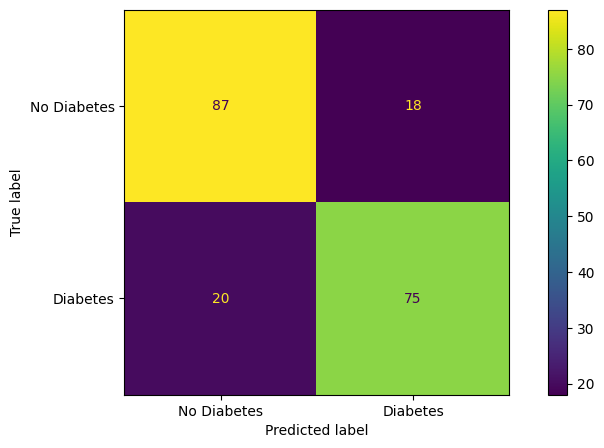

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Diabetes', 'Diabetes']).plot()

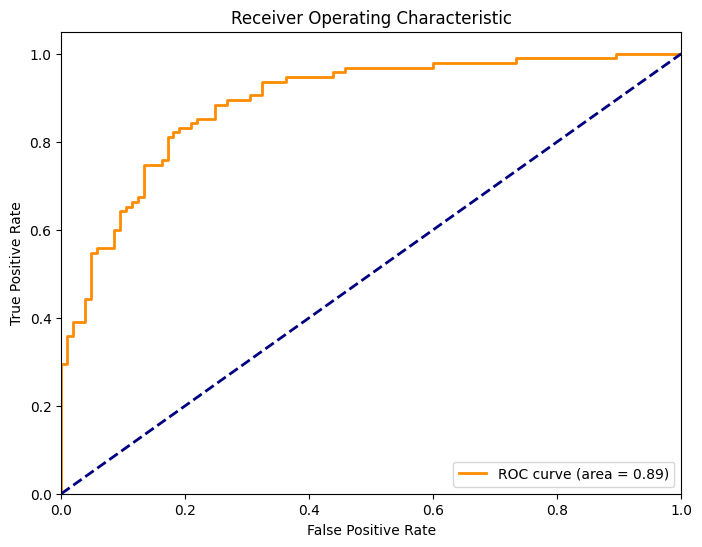

In [35]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False),
}

In [38]:
param_distributions = {
    "Logistic Regression": {"C": uniform(0.1, 10)},
    "Random Forest": {"n_estimators": randint(50, 200), "max_depth": randint(3, 10)},
    "Gradient Boosting": {"n_estimators": randint(50, 200), "max_depth": randint(3, 10)},
    "SVM": {"C": uniform(0.1, 10), "gamma": uniform(0.1, 1)},
    "Naive Bayes": {},
    "XGBoost": {"n_estimators": randint(50, 200), "max_depth": randint(3, 10)},
}

In [39]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV object
random_searches = {}
for name, model in models.items():
    print(f"Running RandomizedSearchCV for {name}")
    random_search = RandomizedSearchCV(
        model,
        param_distributions[name],
        n_iter=10,
        scoring="accuracy",
        n_jobs=-1,
        cv=kf,
        random_state=42,
        return_train_score=True,
    )
    random_search.fit(X_train_scaled, y_train, sample_weight=sample_weight)
    random_search.score(X_test_scaled, y_test)
    random_searches[name] = random_search

# Display the best scores
for name, random_search in random_searches.items():
    print(f"Best score for {name}: {random_search.best_score_}")
    print(f"Best params for {name}: {random_search.best_params_}")

Running RandomizedSearchCV for Logistic Regression
Running RandomizedSearchCV for Random Forest
Running RandomizedSearchCV for Gradient Boosting
Running RandomizedSearchCV for SVM
Running RandomizedSearchCV for Naive Bayes
Running RandomizedSearchCV for XGBoost
Best score for Logistic Regression: 0.79125
Best params for Logistic Regression: {'C': 0.6808361216819946}
Best score for Random Forest: 0.8800000000000001
Best params for Random Forest: {'max_depth': 9, 'n_estimators': 171}
Best score for Gradient Boosting: 0.8875
Best params for Gradient Boosting: {'max_depth': 7, 'n_estimators': 149}
Best score for SVM: 0.8637500000000001
Best params for SVM: {'C': 8.424426408004217, 'gamma': 0.31233911067827613}
Best score for Naive Bayes: 0.7825
Best params for Naive Bayes: {}
Best score for XGBoost: 0.8949999999999999
Best params for XGBoost: {'max_depth': 5, 'n_estimators': 124}


In [40]:
Rf_model = RandomForestClassifier(n_estimators=51, max_depth=8)
Rf_model.fit(X_train_scaled, y_train, sample_weight=sample_weight)
Rf_model.score(X_test_scaled, y_test)

0.935

In [41]:
y_pred = Rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       105
           1       0.91      0.96      0.93        95

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



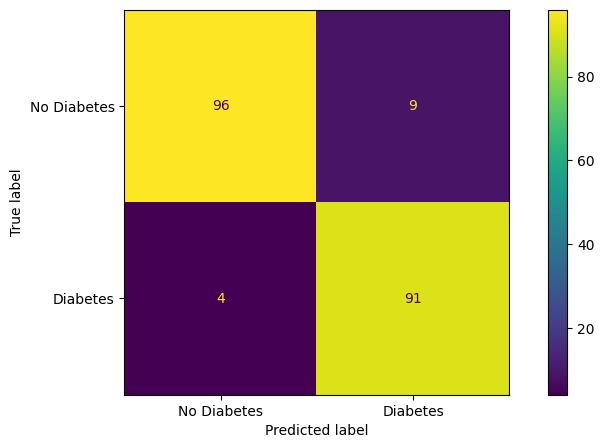

In [42]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=["No Diabetes", "Diabetes"]
).plot()

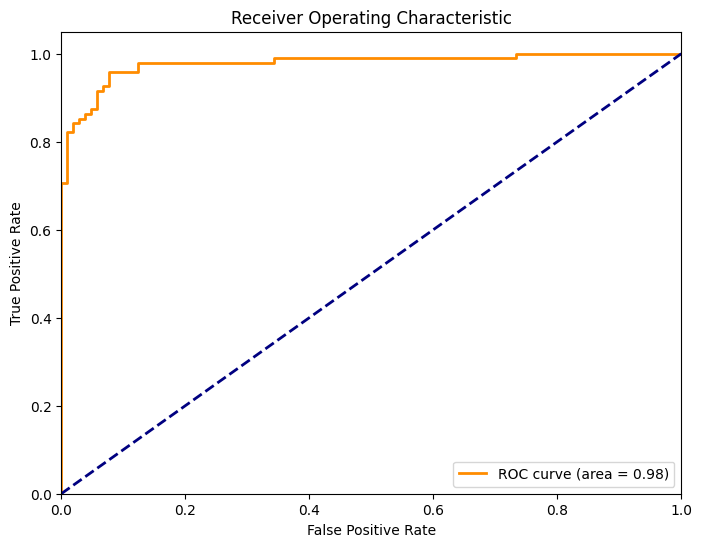

In [43]:
# Get the predicted probabilities
y_pred_proba = Rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [44]:
gb_model = GradientBoostingClassifier(n_estimators=149, max_depth=10)
gb_model.fit(X_train_scaled, y_train, sample_weight=sample_weight)
gb_model.score(X_test_scaled, y_test)

0.93

In [45]:
y_pred = gb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.94      0.92      0.93        95

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



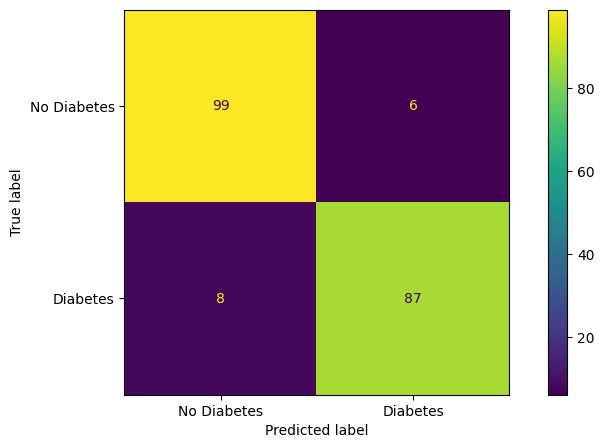

In [46]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=["No Diabetes", "Diabetes"]
).plot()

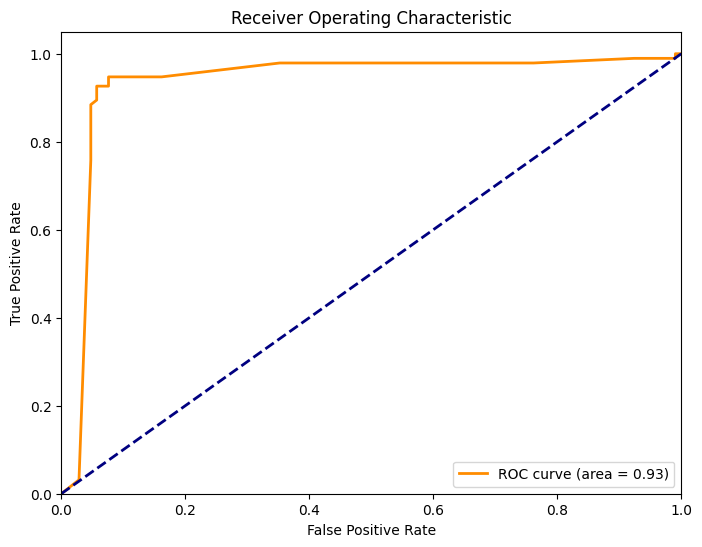

In [47]:
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [48]:
sv_model = SVC(C=0.75, gamma=1.5, probability=True)
sv_model.fit(X_train_scaled, y_train, sample_weight=sample_weight)
sv_model.score(X_test_scaled, y_test)

0.875

In [49]:
y_pred = sv_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.90      0.83      0.86        95

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



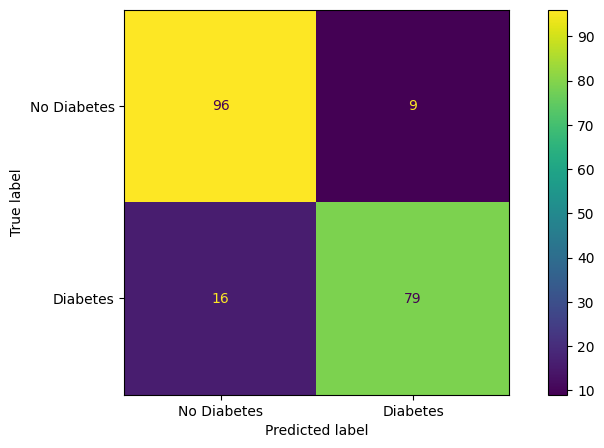

In [50]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=["No Diabetes", "Diabetes"]
).plot()

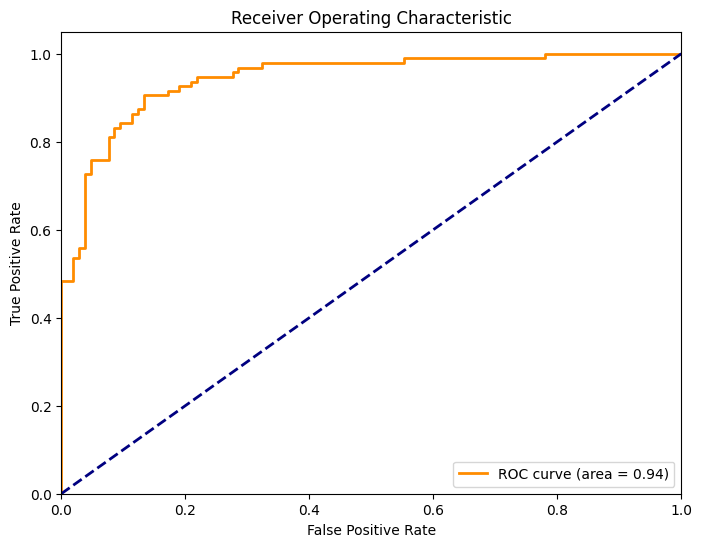

In [51]:
y_pred_proba = sv_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [52]:
xgb_model = XGBClassifier(n_estimators=160, max_depth=6)
xgb_model.fit(X_train_scaled, y_train, sample_weight=sample_weight)
xgb_model.score(X_test_scaled, y_test)

0.93

In [53]:
y_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       105
           1       0.93      0.93      0.93        95

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



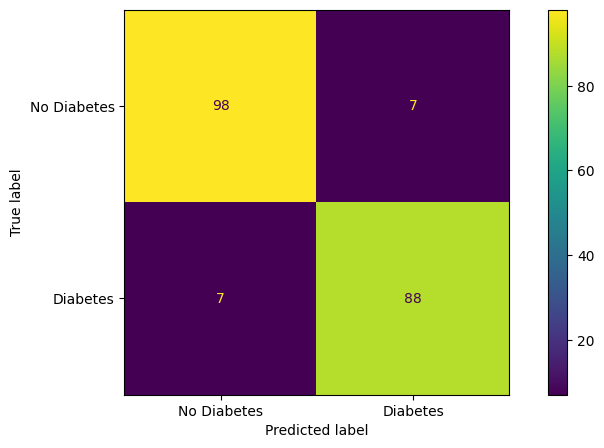

In [54]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=["No Diabetes", "Diabetes"]
).plot()

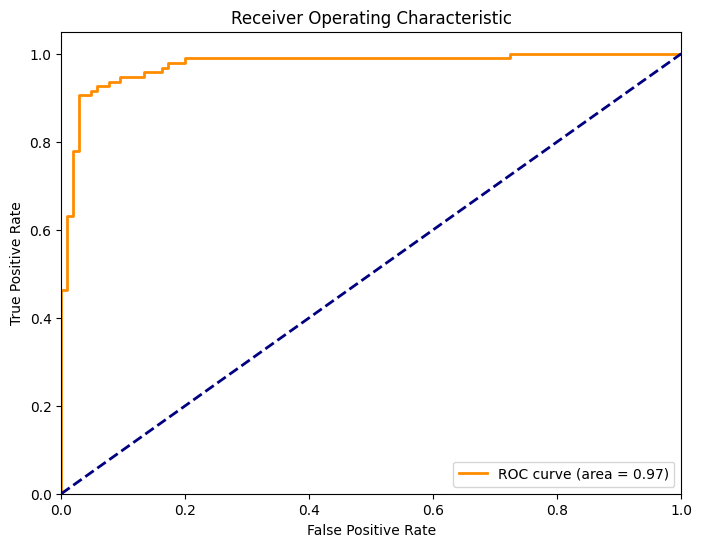

In [55]:
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [56]:
# using the best models to create a supreme model
estimators = [
    ("GradientBossting", GradientBoostingClassifier(n_estimators=159, max_depth=10)),
    ("rf", RandomForestClassifier(n_estimators=151, max_depth=8)),
    ("xgb", XGBClassifier(n_estimators=160, max_depth=6)),
    ("svc", SVC(C=0.75, gamma=1.5, probability=True)),
]

In [57]:
from sklearn.ensemble import StackingClassifier


clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)
clf.fit(X_train_scaled, y_train, sample_weight=sample_weight).score(
    X_test_scaled, y_test
)

0.935

In [58]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.93      0.94      0.93        95

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



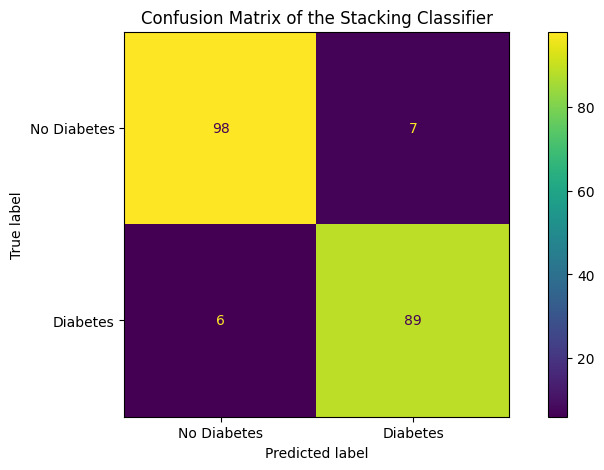

In [59]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=["No Diabetes", "Diabetes"]
).plot()
plt.title("Confusion Matrix of the Stacking Classifier")
plt.show()

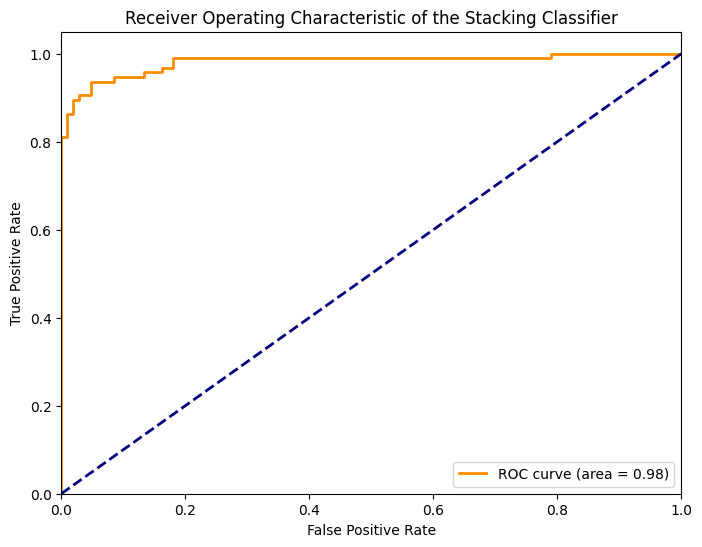

In [60]:
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic of the Stacking Classifier")
plt.legend(loc="lower right")
plt.show()

In [61]:
class Person:

    def __init__(
        self,
        weight,
        height,
        Age = None,
        Glucose = None,
        Pregnancies = None,
        SkinThickness = None,
        Insulin = None,
        BloodPressure = None,
        DiabetesPedigreeFunction = None,
    ):

        self.weight = weight
        self.height = height
        self.age = Age
        self.glucose = Glucose
        self.pregnancies = Pregnancies
        self.blood_pressure = BloodPressure
        self.diabetes_pedigree_function = DiabetesPedigreeFunction
        self.skin_thickness = SkinThickness
        self.insulin = Insulin
        self.bmi = self.bmi_calculator(weight, height)
        self.mean_values = X_train.mean().to_dict()

    def fill_missing_values(self, feature_values):
        # Assuming `feature_values` is a list of feature values where missing values are represented by `None`
        filled_values = [
            val if val is not None else self.mean_values[feature_name]
            for val, feature_name in zip(feature_values, self.mean_values.keys())
        ]
        return [filled_values]


    def fit(self, X):
        X_new = X * mutual_info
        X_new_scaled = R_scaler.transform(X=X_new)
        return X_new_scaled


    def bmi_calculator(self, weight, height):


        return weight / (height / 100) ** 2


    def predict_diabetes(self):

        feature_values = [
                self.pregnancies,
                self.glucose,
                self.blood_pressure,
                self.skin_thickness,
                self.insulin,
                self.bmi,
                self.diabetes_pedigree_function,
                self.age,
            ]

        feature_values = self.fill_missing_values(feature_values)
        return clf.predict(self.fit(feature_values))


    def predict_diabetes_probability(self):
        feature_values = [  
                self.pregnancies,
                self.glucose,
                self.blood_pressure,
                self.skin_thickness,
                self.insulin,
                self.bmi,
                self.diabetes_pedigree_function,
                self.age,
            ]

        feature_values = self.fill_missing_values(feature_values)
        X_new_scaled = self.fit(feature_values)

        return np.round(clf.predict_proba(X_new_scaled)[0][1], 3) * 100

# What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

In [62]:
# Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL
Gloria = Person(weight=96, height=178, Age=54, Glucose=125)
Gloria.predict_diabetes_probability()

71.1

In [64]:
import joblib

# Save the model
joblib.dump(clf, "model/diabetes_model.pkl")
joblib.dump(mutual_info, "utils/mutual_info.pkl")
joblib.dump(R_scaler, "utils/scaler.pkl")

['utils/scaler.pkl']